In [ ]:
Part 2: 


Accuracy: 0.6923076923076923
Confusion Matrix:
 [[61 19]
 [25 38]]


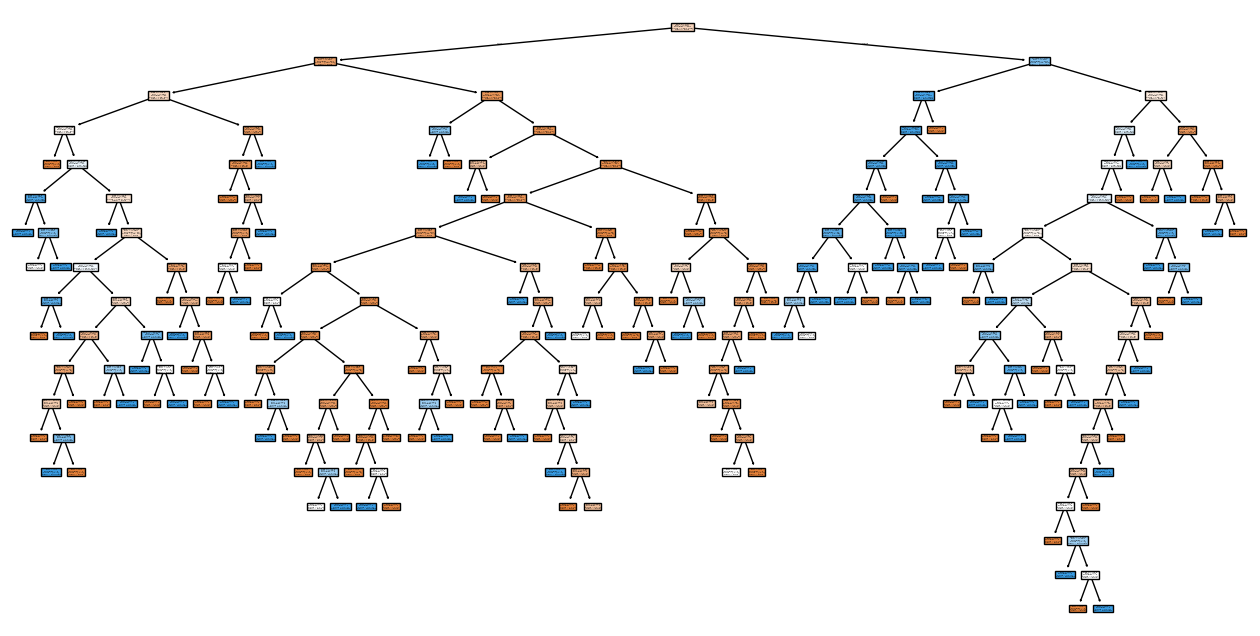

In [1]:
# Task 5: Titanic Dataset with DecisionTreeClassifier

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select features
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'fare', 'embarked']]
df.dropna(inplace=True)  # Drop rows with missing values

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Split data
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize tree
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.show()


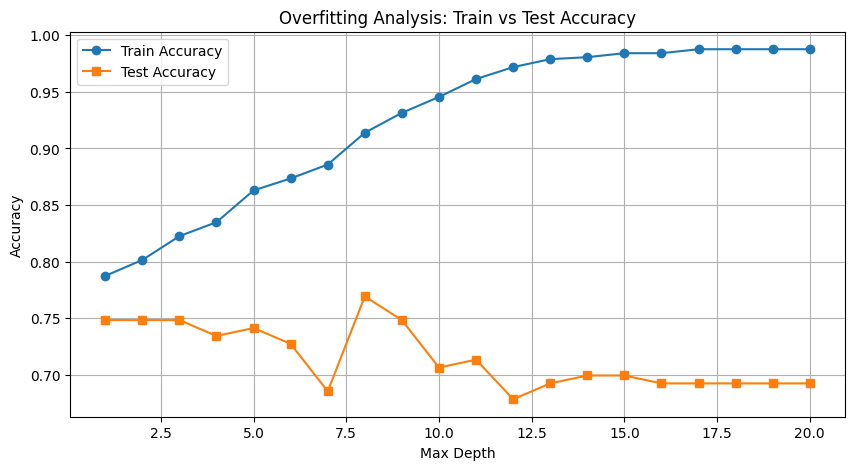

In [2]:
# Task 6: Model Tuning and Overfitting Plot

train_acc = []
test_acc = []
depths = list(range(1, 21))

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

# Plotting Training vs Testing Accuracy
plt.figure(figsize=(10, 5))
plt.plot(depths, train_acc, label='Train Accuracy', marker='o')
plt.plot(depths, test_acc, label='Test Accuracy', marker='s')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis: Train vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()
